## Applied Data Analysis in Python

### Fitting Data
#### The process of extracting information from data using computers is called machine learning

#### Machine learning a very large field and covers a whole hot of techniques. In this course we will be discovering a few of them but let's first start with the simplest form of machine learning, the linear fit or linear regression.

### Input Data
#### Firs we'll need some data. Let's pretend that we've measured these data from an experiment and we want to extract the underlying parameters of the system that generated them.

#### There's a prepared CSV file which you read into pandas using read_csv:

In [22]:
from pandas import read_csv

data = read_csv(r"C:\Users\Admin\Downloads\Data\linear.csv")
data.head()

,x,y
0,6887,9128.5
1,11370,9129.0
2,12080,12080.0
3,12245,12245.0
4,15096,15096.0


##### Macine Learning is simply a statistical technique for measuring data using a computer/machine as the learning medium

In [23]:
data.count() # How many pieces of data do we have?

x    28
y    28
dtype: int64

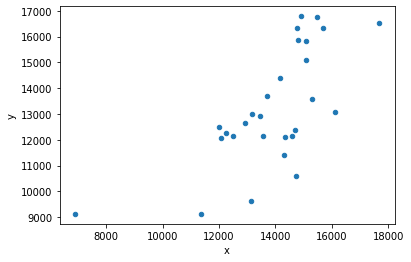

In [24]:
data.plot.scatter("x", "y")# What data looks like when plotted

In [ ]:
# We'll be using Scikitlearn to give us a nice interface to extract our data

In [26]:
from sklearn.linear_model import LinearRegression # Import a class and make an instance of that class to make an empty model that knows how to learn but  hasn't learned anyting yet

In [29]:
model = LinearRegression(fit_intercept = True)  

#### There are things that you can tune and set upfront in advance, things earned in the process are called parameters and those that you set upfront are called hyperparameters 

#### In order to allow model to extract you have to show it data

In [31]:
model.fit(data[["x"]], data["y"]) # It's very important to be mindful of the kind of data you pass in fit function, double brackets ensure it is a two-dimensional data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

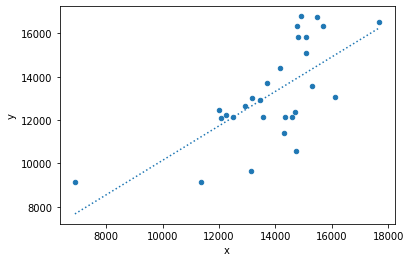

In [32]:
# Grab upper and lower bound
from pandas import DataFrame

x_fit = DataFrame([data["x"].min(), data["x"].max()])
y_predicted = model.predict(x_fit)

ax = data.plot.scatter("x", "y")
ax.plot(x_fit, y_predicted, linestyle = ":")

In [34]:
# Extract numeric data from model with zero coefficient
model.coef_[0]

0.7939559206995517

In [35]:
# returns an array to have a conistent interface incase of polynomial coefficient

In [36]:
model.intercept_ # They have underscore at the end which is a scikitlearn naming convention to represent attributes which only exist after the fit has been formed (show learned attributee) 

2206.956774263568

#### Diabetes dataset

In [38]:
from sklearn.datasets import load_diabetes

diabetes = DataFrame(load_diabetes().data, columns = load_diabetes().feature_names)
diabetes["target"] = load_diabetes().target

diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


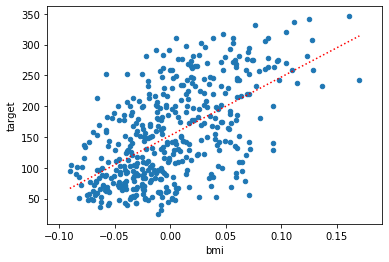

In [43]:
ax = diabetes.plot.scatter("bmi", "target")

model = LinearRegression(fit_intercept = True)
model.fit(diabetes[["bmi"]], diabetes["target"])

x_fit = DataFrame([diabetes["bmi"].min(), diabetes["bmi"].max()])
y_pred = model.predict(x_fit)

ax.plot(x_fit, y_pred, linestyle =":", color = "red")

#### Question: Why does fit() need a 2D array for X?
##### Answer: In general your data will have multiple names/columns/features you've made and you want to make one eventual prediction. fit() always assumes two dimesional data so even one column must be passed as 2D.

In [44]:
diabetes.ndim #check how many dimensions

2

In [45]:
diabetes.shape

(442, 11)

In [46]:
diabetes.shape # check the shape

(442, 11)

In [47]:
diabetes["bmi"] # Train based on bmi so let's check what that looks like

0      0.061696
1     -0.051474
2      0.044451
3     -0.011595
4     -0.036385
         ...   
437    0.019662
438   -0.015906
439   -0.015906
440    0.039062
441   -0.073030
Name: bmi, Length: 442, dtype: float64

In [48]:
diabetes["bmi"].ndim  # Confirm that it is one dimension

1